In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [4]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
path = Path('/drive/My Drive/ML DL Data/green-apple_pear_guava')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='Train', valid='Validate',
                                 ds_tfms=get_transforms(),
                                 size=256).normalize()

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['green_apple', 'guava', 'pear'], 3, 390, 88)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


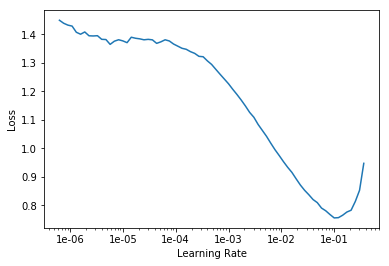

In [10]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.346959,0.943410,0.500000,00:06
1,1.043151,0.488677,0.136364,00:06
2,0.861060,0.439349,0.125000,00:06


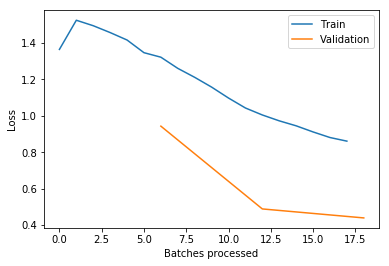

In [18]:
learn.recorder.plot_losses()

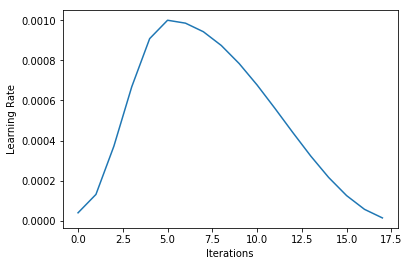

In [19]:
learn.recorder.plot_lr()

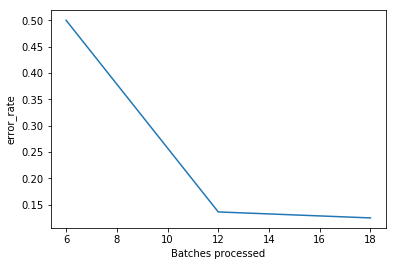

In [20]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-1')

In [46]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (390 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Valid: LabelList (88 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


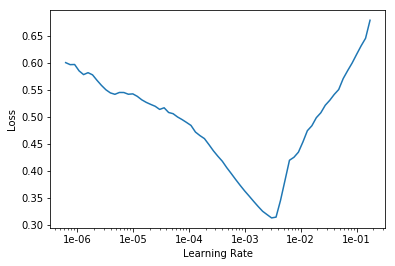

In [24]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(4, slice(3e-5, 7e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.572129,0.347872,0.113636,00:06
1,0.412292,0.294607,0.125000,00:06
2,0.327252,0.266736,0.090909,00:06
3,0.259896,0.260836,0.090909,00:06


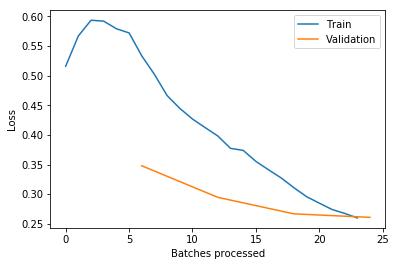

In [49]:
learn.recorder.plot_losses()

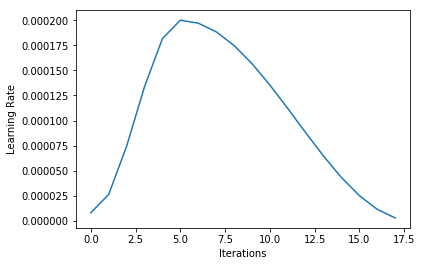

In [41]:
learn.recorder.plot_lr()

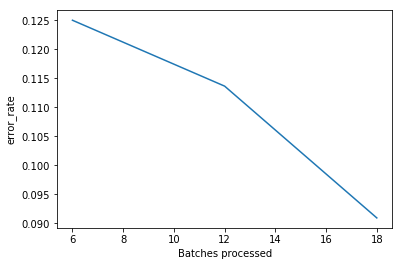

In [40]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 5e-4))

In [0]:
learn.save('stage-3')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('green_apple', 'pear', 2),
 ('pear', 'green_apple', 2),
 ('green_apple', 'guava', 1),
 ('guava', 'green_apple', 1),
 ('guava', 'pear', 1)]

In [0]:
interp.plot_top_losses(9)

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses(9)

In [0]:
interp.most_confused()

[('green_apple', 'guava', 2),
 ('green_apple', 'pear', 2),
 ('pear', 'green_apple', 2),
 ('guava', 'green_apple', 1),
 ('guava', 'pear', 1)]

In [0]:
learn.load('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('green_apple', 'guava', 2),
 ('pear', 'green_apple', 2),
 ('green_apple', 'pear', 1),
 ('guava', 'pear', 1)]

In [0]:
interp.plot_top_losses(9)

In [0]:
from fastai.metrics import *

In [0]:
learn.metrics=[error_rate,
               Precision(average='micro'),
               Recall(average='micro'),
               FBeta(average='micro')]

In [0]:
doc(learn.export)

In [55]:
!mkdir '/drive/My Drive/ML DL Data/saved_models'
save_path = Path('/drive/My Drive/ML DL Data/saved_models')

mkdir: cannot create directory ‘/drive/My Drive/ML DL Data/saved_models’: File exists


In [0]:
learn.export(file=save_path/'green_apple_2_new.pkl')

In [0]:
img = open_image('./img2.jpeg')
img

In [0]:
doc(load_learner)

In [0]:
model = load_learner(save_path, file='green_apple_2_new.pkl')

In [60]:
pred_class, pred_idx, outputs = model.predict(img)
pred_class

Category green_apple

In [0]:
pred_idx

tensor(0)

In [61]:
outputs

tensor([0.6587, 0.1659, 0.1754])

In [74]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (390 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Valid: LabelList (88 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [0]:
learn.freeze()

In [0]:
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


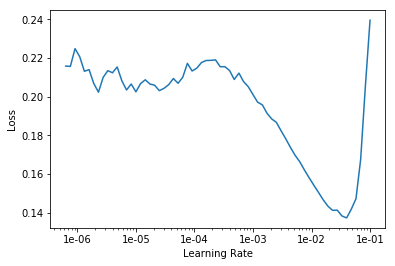

In [66]:
learn.lr_find()
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(2, 8e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.226249,0.261225,0.125000,00:09
1,0.170572,0.206783,0.056818,00:10


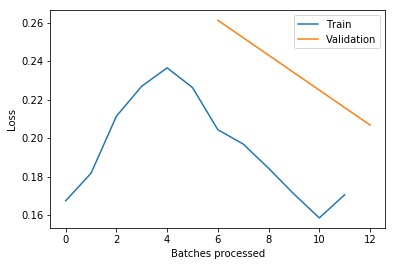

In [78]:
learn.recorder.plot_losses()

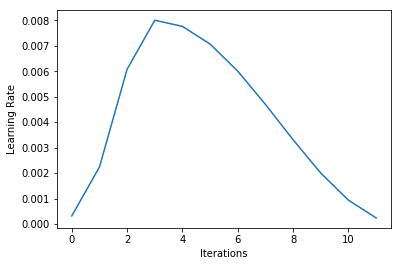

In [79]:
learn.recorder.plot_lr()

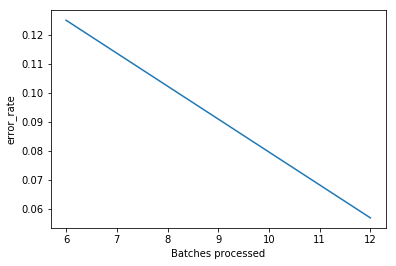

In [80]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-3')

In [96]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (390 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Valid: LabelList (88 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [0]:
learn.unfreeze()

In [83]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


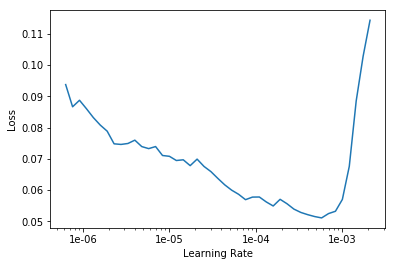

In [84]:
learn.recorder.plot()

In [98]:
learn.fit_one_cycle(2, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.067621,0.177936,0.079545,00:10
1,0.063596,0.207033,0.090909,00:10


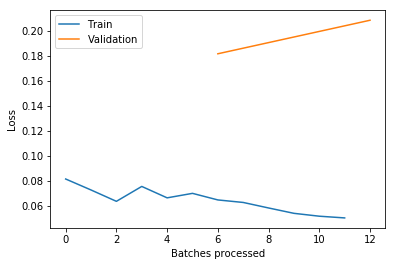

In [95]:
learn.recorder.plot_losses()

In [0]:
img = open_image('./img6.jpeg')

In [0]:
a, b, c = learn.predict(img)

In [104]:
a

Category pear

In [0]:
learn.export(file=save_path/'green_apple_2_new.pkl')